# <u>Fancy Indexing</u>

In [2]:
import numpy as np

## Exploring Fancy Indexing

In [3]:
rng = np.random.default_rng(seed=1701)

In [4]:
x = rng.integers(100, size=10)
x

array([90, 40,  9, 30, 80, 67, 39, 15, 33, 79])

In [6]:
[x[3], x[7], x[2]]

[30, 15, 9]

In [7]:
ind = [3, 7, 2]
x[ind]

array([30, 15,  9])

In [9]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[30, 15],
       [80, 67]])

In [15]:
# Fancy indexing also works in multiple dimensions.

X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
# Like with standard indexing, the first index refers to the row, and the second to the column

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [17]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## Combined Indexing

In [18]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [29]:
# slicing syntax X[start:stop:step, start:stop:step], we can provide a slice for every dimension

In [20]:
# We can combine fancy and simple indices

X[2, [2, 0, 1]]

array([10,  8,  9])

In [24]:
# We can also combine fancy indexing with slicing

X[0::2, [2, 0, 1]]

array([[ 2,  0,  1],
       [10,  8,  9]])

In [26]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [27]:
X[:2, [2, 0, 1]]

array([[2, 0, 1],
       [6, 4, 5]])

In [28]:
X[[2,0,1], 1:]

array([[ 9, 10, 11],
       [ 1,  2,  3],
       [ 5,  6,  7]])

In [34]:
# we can combine fancy indexing with masking

mask = np.array([True, False, True, False]) 
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

In [35]:
mean = [0, 0]
cov = [[1, 2],
    [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

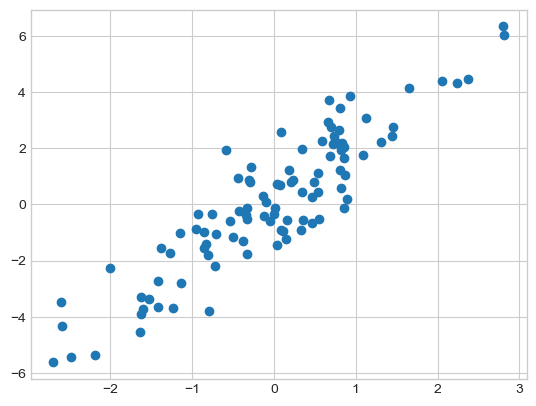

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.scatter(X[:, 0], X[:, 1]);

In [69]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 0, 25, 76, 62, 56, 13, 81, 69, 35, 61, 73, 95, 10, 17, 89, 11, 14,
       51, 97, 28])

In [70]:
selection = X[indices] # fancy indexing here 
selection.shape

(20, 2)

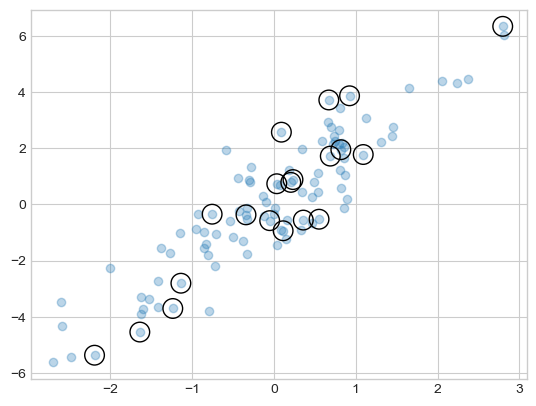

In [71]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolor='black', s=200);

## Modifying Values with Fancy Indexing

In [72]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [74]:
x[i] -= 10
print(x)

[ 0 79 79  3 79  5  6  7 79  9]


In [76]:
x = np.zeros(10)
i=[2,3,3,4,4,4]
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Example: Binning Data

In [80]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [82]:
# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

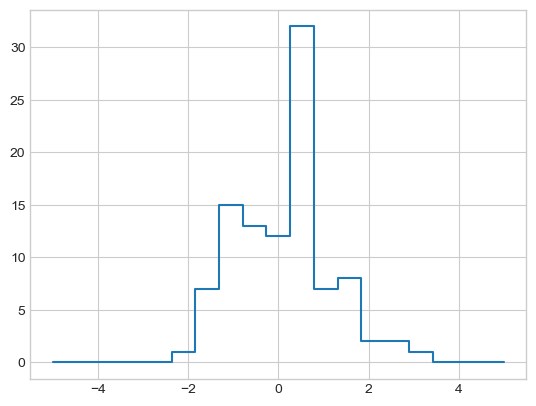

In [83]:
# plot the results
plt.plot(bins, counts, drawstyle='steps');

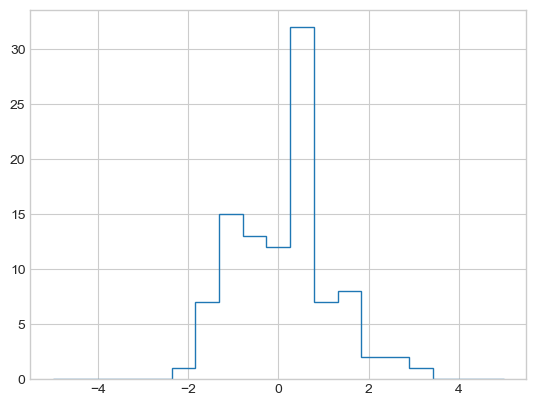

In [85]:
# This is why Matplotlib provides the plt.hist routine, which does the same in a single line

plt.hist(x, bins, histtype='step');